In [1]:
import numpy as np
import pandas as pd
import random
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import sys
sys.path.append('../')
from common.plot_style_utils import set_pub_plot_context, save_for_pub
%matplotlib inline

In [2]:
# First, figure 3a, some example network diagrams
lineages = pickle.load(open("../../data/lineages/lineage2ids.pickle", "rb"))
lineages

,addgene_id
lineage,
0,"[49, 50, 16400, 24411, 24521, 24522, 24523, 24..."
1,"[1191, 1280]"
2,"[1345, 1884, 16434, 16435, 16436, 16437, 16438..."
3,"[1351, 1352, 1357, 1358, 1380, 1381, 8851, 885..."
4,"[1355, 1356, 8855]"
5,"[1730, 1731]"
6,"[1764, 1768, 1769, 1770, 1771, 1772, 1775, 178..."
7,"[1765, 1773, 11254, 11364, 11365, 11366, 18116..."
8,"[1767, 1774, 1780, 8581, 8582, 9048, 10891, 39..."


In [3]:
ancestors = pickle.load(open("../../data/lineages/ancestors.pickle", "rb"))
descendents = pickle.load(open("../../data/lineages/descendents.pickle", "rb"))
display(ancestors)
display(descendents)

,ancestor_ids
addgene_id,
49,[16400]
50,[16400]
1191,[1280]
1345,[16440]
1351,[8856]
1352,[8856]
1355,[8855]
1356,[8855]
1357,[8851]


,descendent_id
ancestor_id,
1280.0,[1191]
1380.0,"[1381, 8923]"
1490.0,[61021]
1494.0,"[21824, 21825, 31240, 37464, 62599]"
1495.0,[37465]
1496.0,[37466]
1497.0,"[26814, 52032]"
1592.0,[74486]
1632.0,[38144]


In [4]:
lineages['size'] = lineages.addgene_id.map(len)
lineages['size'].argmax()

/media/sandias42/ExDrive/Software/Python/Anaconda/envs/attrib/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


868

In [5]:
lineages.iloc[868,:]

addgene_id    [52963, 75481, 75482, 75483, 75484, 75485, 754...
size                                                       2732
Name: 868, dtype: object

/media/sandias42/ExDrive/Software/Python/Anaconda/envs/attrib/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


mkdir: cannot create directory ‘../../data/manuscript/figs/4/a_networks’: File exists


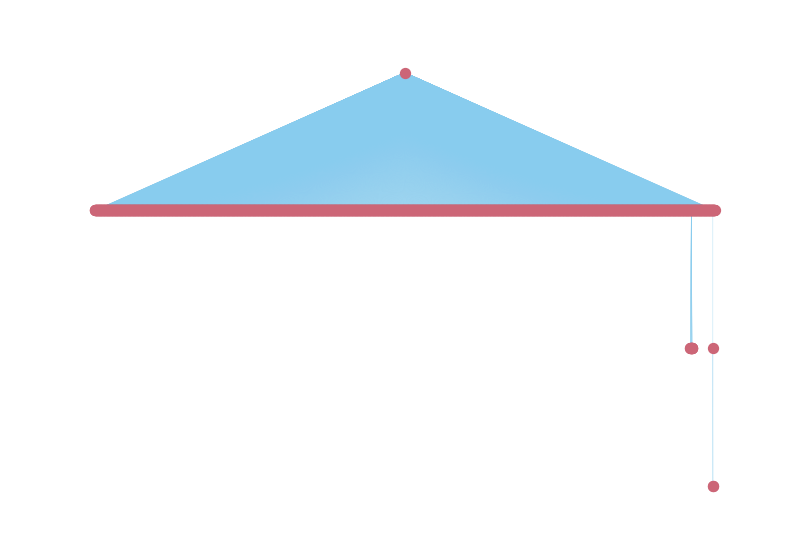

In [6]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
# graph 3 unique lineages, 868
lineage_to_graph = lineages.loc[868, 'addgene_id']
#print(lineage_to_graph)
lin_des = descendents.loc[lineage_to_graph,:].dropna()
#print(lin_des)
from_link = []
to_link = []
for index in lin_des.index.values:
    tos = lin_des.loc[index,'descendent_id']
    #print(tos)
    to_link += tos
    from_link += [index] * len(tos)
    
#print(from_link[:10])


tograph = pd.DataFrame({"from":from_link, "to":to_link})
G = nx.from_pandas_edgelist(tograph, "from", "to",create_using=nx.DiGraph)
#nx.draw(G, withlabels=False, width=1, node_size=1, pos=nx.kamada_kawai_layout(G));
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
fig = plt.figure(figsize=(3,2), dpi=250)
nx.draw(G, pos,withlabels=False, width=.09, node_size=6, arrowsize=0.01, alpha=1, 
        edge_color=palette[0], node_color=palette[1], nodeshape="o") #linewidths=4)
!mkdir ../../data/manuscript/figs/4/a_networks
save_for_pub(fig, path="../../data/manuscript/figs/4/a_networks/1_v0", dpi=500)

In [7]:
from_link = []
to_link = []
for index in descendents.index.values:
    tos = descendents.loc[index,'descendent_id']
    to_link += tos
    from_link += [index] * len(tos)
    
graph = pd.DataFrame({"from":from_link, "to": to_link})
graph

,from,to
0,1280.0,1191
1,1380.0,1381
2,1380.0,8923
3,1490.0,61021
4,1494.0,21824
5,1494.0,21825
6,1494.0,31240
7,1494.0,37464
8,1494.0,62599
9,1495.0,37465


In [8]:
num_nodes = []
rads = []
diams = []

for i,lineage in lineages.addgene_id.iteritems():
    subgraph = graph[graph['to'].isin(lineage) | graph['to'].isin(lineage)]
    num_nodes.append(len(lineage))
    #display(subgraph)
    G = nx.from_pandas_edgelist(subgraph, "from", "to",)#create_using=nx.DiGraph)
    diams.append(nx.algorithms.distance_measures.diameter(G))
    rads.append(nx.algorithms.distance_measures.radius(G))

In [9]:
np.argmax(rads)

13

In [10]:
np.argmax(diams)

13

mkdir: cannot create directory ‘../../data/manuscript/figs/4/a_networks’: File exists


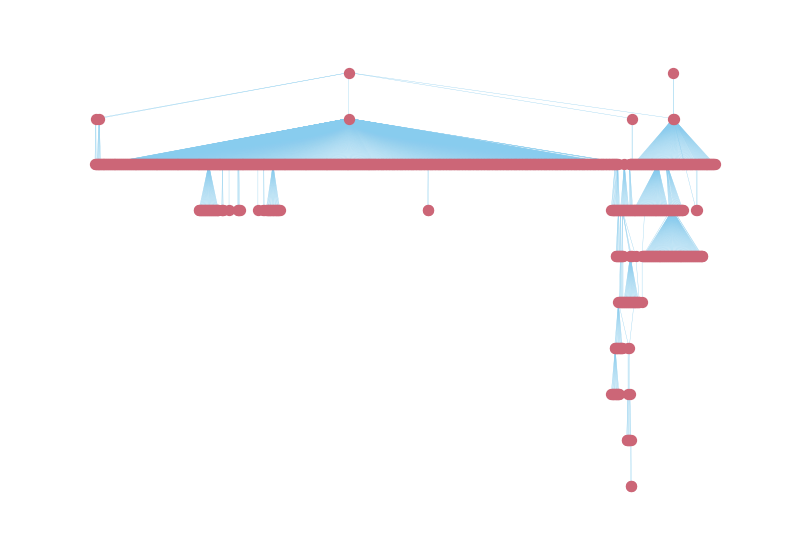

In [11]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
# graph 3 unique lineages, 868
lineage_to_graph = lineages.loc[13, 'addgene_id']
#print(lineage_to_graph)
lin_des = descendents.loc[lineage_to_graph,:].dropna()
#print(lin_des)
from_link = []
to_link = []
for index in lin_des.index.values:
    tos = lin_des.loc[index,'descendent_id']
    #print(tos)
    to_link += tos
    from_link += [index] * len(tos)
    
#print(from_link[:10])


tograph = pd.DataFrame({"from":from_link, "to":to_link})
G = nx.from_pandas_edgelist(tograph, "from", "to",create_using=nx.DiGraph)
#nx.draw(G, withlabels=False, width=1, node_size=1, pos=nx.kamada_kawai_layout(G));
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
fig = plt.figure(figsize=(3,2), dpi=250)
nx.draw(G, pos,withlabels=False, width=.09, node_size=6, arrowsize=0.01, alpha=1, 
        edge_color=palette[0], node_color=palette[1], nodeshape="o") #linewidths=4)
!mkdir ../../data/manuscript/figs/4/a_networks
save_for_pub(fig, path="../../data/manuscript/figs/4/a_networks/2_v0", dpi=500)

In [12]:
np.argsort(diams)[-10:]

array([309, 400, 311, 330,  22,  23, 105, 130,   6,  13])

In [13]:
np.argsort(rads)[-10:]

array([400,  25, 311, 330,  22,  23, 105, 130,   6,  13])

mkdir: cannot create directory ‘../../data/manuscript/figs/4/a_networks’: File exists


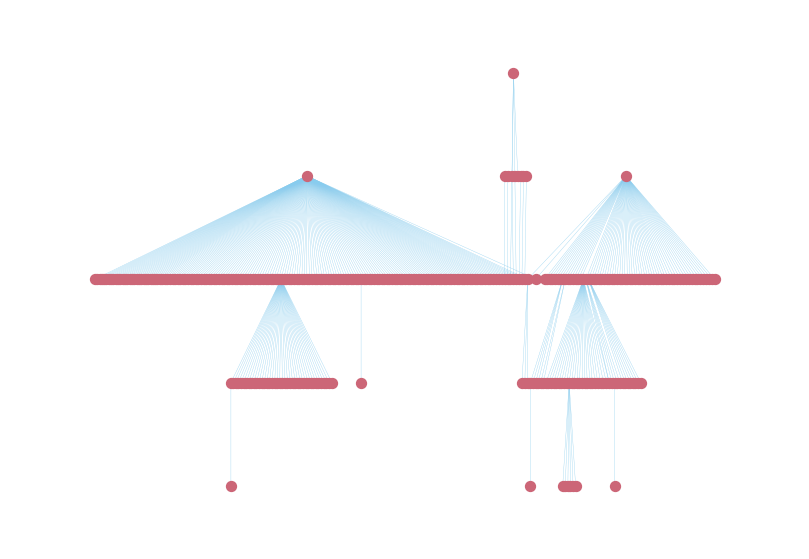

In [14]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
# graph 3 unique lineages, 868
lineage_to_graph = lineages.loc[6, 'addgene_id']
#print(lineage_to_graph)
lin_des = descendents.loc[lineage_to_graph,:].dropna()
#print(lin_des)
from_link = []
to_link = []
for index in lin_des.index.values:
    tos = lin_des.loc[index,'descendent_id']
    #print(tos)
    to_link += tos
    from_link += [index] * len(tos)
    
#print(from_link[:10])


tograph = pd.DataFrame({"from":from_link, "to":to_link})
G = nx.from_pandas_edgelist(tograph, "from", "to",create_using=nx.DiGraph)
#nx.draw(G, withlabels=False, width=1, node_size=1, pos=nx.kamada_kawai_layout(G));
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
fig = plt.figure(figsize=(3,2), dpi=250)
nx.draw(G, pos,withlabels=False, width=.09, node_size=6, arrowsize=0.01, alpha=1, 
        edge_color=palette[0], node_color=palette[1], nodeshape="o") #linewidths=4)
!mkdir ../../data/manuscript/figs/4/a_networks
save_for_pub(fig, path="../../data/manuscript/figs/4/a_networks/3_v0", dpi=500)

mkdir: cannot create directory ‘../../data/manuscript/figs/4/a_networks’: File exists


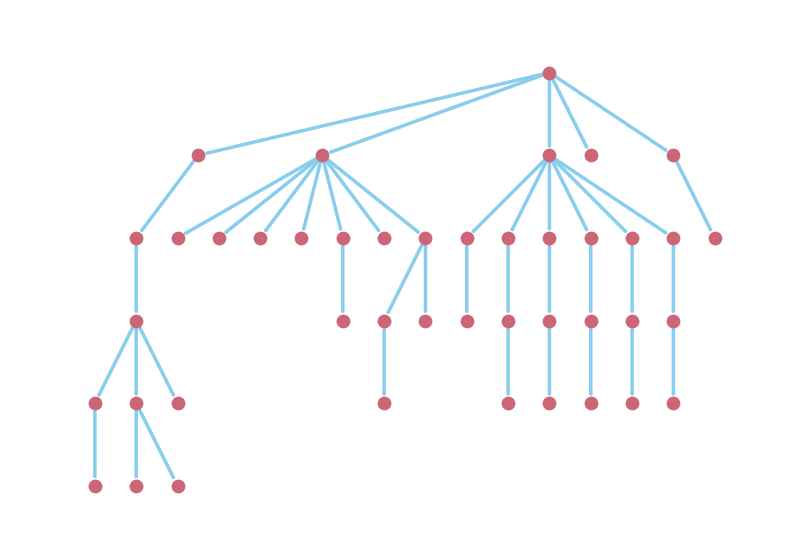

In [15]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
# graph 3 unique lineages, 868
lineage_to_graph = lineages.loc[130, 'addgene_id']
#print(lineage_to_graph)
lin_des = descendents.loc[lineage_to_graph,:].dropna()
#print(lin_des)
from_link = []
to_link = []
for index in lin_des.index.values:
    tos = lin_des.loc[index,'descendent_id']
    #print(tos)
    to_link += tos
    from_link += [index] * len(tos)
    
#print(from_link[:10])


tograph = pd.DataFrame({"from":from_link, "to":to_link})
G = nx.from_pandas_edgelist(tograph, "from", "to",create_using=nx.DiGraph)
#nx.draw(G, withlabels=False, width=1, node_size=1, pos=nx.kamada_kawai_layout(G));
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
fig = plt.figure(figsize=(3,2), dpi=250)
nx.draw(G, pos,withlabels=False, width=1, node_size=10, arrowsize=0.01, alpha=1, 
        edge_color=palette[0], node_color=palette[1], nodeshape="o") #linewidths=4)
!mkdir ../../data/manuscript/figs/4/a_networks
save_for_pub(fig, path="../../data/manuscript/figs/4/a_networks/4_v0", dpi=500)

mkdir: cannot create directory ‘../../data/manuscript/figs/4/a_networks’: File exists


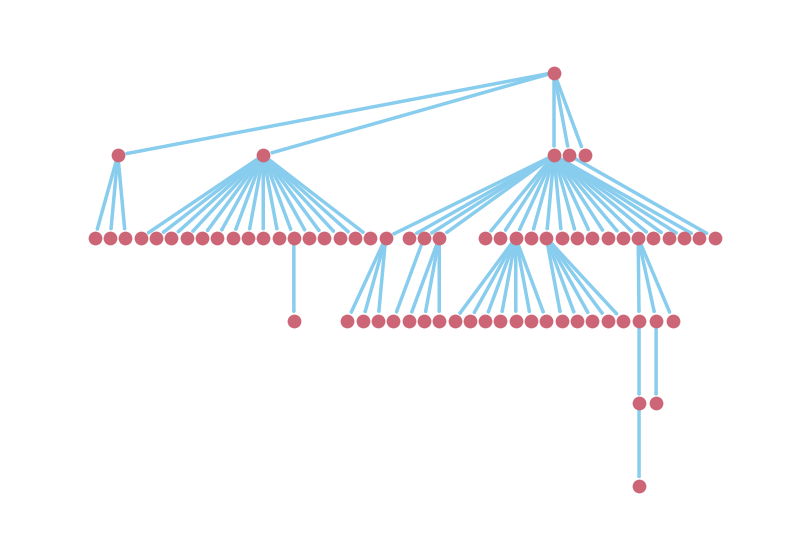

In [16]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
# graph 3 unique lineages, 868
lineage_to_graph = lineages.loc[105, 'addgene_id']
#print(lineage_to_graph)
lin_des = descendents.loc[lineage_to_graph,:].dropna()
#print(lin_des)
from_link = []
to_link = []
for index in lin_des.index.values:
    tos = lin_des.loc[index,'descendent_id']
    #print(tos)
    to_link += tos
    from_link += [index] * len(tos)
    
#print(from_link[:10])


tograph = pd.DataFrame({"from":from_link, "to":to_link})
G = nx.from_pandas_edgelist(tograph, "from", "to",create_using=nx.DiGraph)
#nx.draw(G, withlabels=False, width=1, node_size=1, pos=nx.kamada_kawai_layout(G));
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
fig = plt.figure(figsize=(3,2), dpi=250)
nx.draw(G, pos,withlabels=False, width=1, node_size=10, arrowsize=0.01, alpha=1, 
        edge_color=palette[0], node_color=palette[1], nodeshape="o") #linewidths=4)
!mkdir ../../data/manuscript/figs/4/a_networks
save_for_pub(fig, path="../../data/manuscript/figs/4/a_networks/5_v0", dpi=500)

mkdir: cannot create directory ‘../../data/manuscript/figs/4/a_networks’: File exists


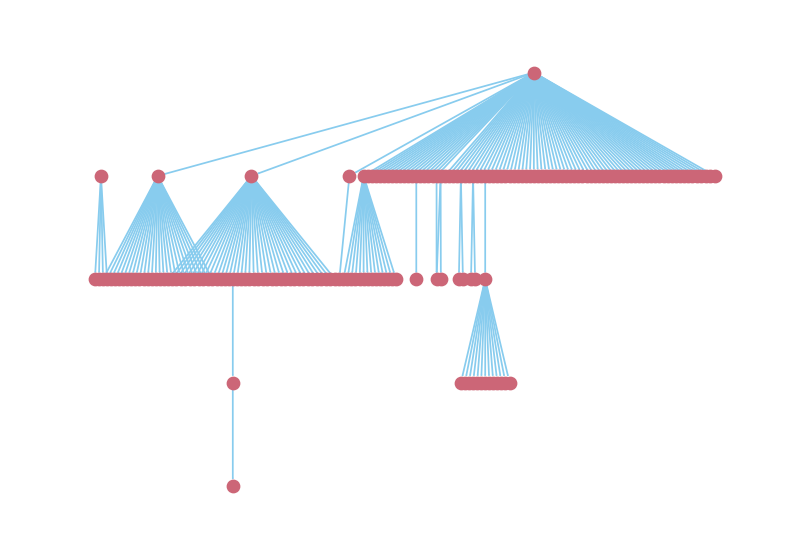

In [17]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
# graph 3 unique lineages, 868
lineage_to_graph = lineages.loc[23, 'addgene_id']
#print(lineage_to_graph)
lin_des = descendents.loc[lineage_to_graph,:].dropna()
#print(lin_des)
from_link = []
to_link = []
for index in lin_des.index.values:
    tos = lin_des.loc[index,'descendent_id']
    #print(tos)
    to_link += tos
    from_link += [index] * len(tos)
    
#print(from_link[:10])


tograph = pd.DataFrame({"from":from_link, "to":to_link})
G = nx.from_pandas_edgelist(tograph, "from", "to",create_using=nx.DiGraph)
#nx.draw(G, withlabels=False, width=1, node_size=1, pos=nx.kamada_kawai_layout(G));
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
fig = plt.figure(figsize=(3,2), dpi=250)
nx.draw(G, pos,withlabels=False, width=.5, node_size=10, arrowsize=0.01, alpha=1, 
        edge_color=palette[0], node_color=palette[1], nodeshape="o") #linewidths=4)
!mkdir ../../data/manuscript/figs/4/a_networks
save_for_pub(fig, path="../../data/manuscript/figs/4/a_networks/6_v0", dpi=500)

mkdir: cannot create directory ‘../../data/manuscript/figs/4/a_networks’: File exists


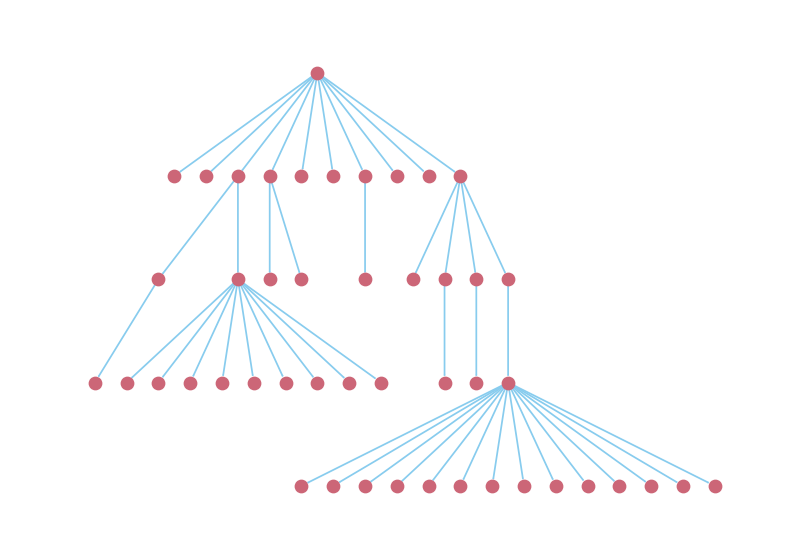

In [18]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
# graph 3 unique lineages, 868
lineage_to_graph = lineages.loc[22, 'addgene_id']
#print(lineage_to_graph)
lin_des = descendents.loc[lineage_to_graph,:].dropna()
#print(lin_des)
from_link = []
to_link = []
for index in lin_des.index.values:
    tos = lin_des.loc[index,'descendent_id']
    #print(tos)
    to_link += tos
    from_link += [index] * len(tos)
    
#print(from_link[:10])


tograph = pd.DataFrame({"from":from_link, "to":to_link})
G = nx.from_pandas_edgelist(tograph, "from", "to",create_using=nx.DiGraph)
#nx.draw(G, withlabels=False, width=1, node_size=1, pos=nx.kamada_kawai_layout(G));
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
fig = plt.figure(figsize=(3,2), dpi=250)
nx.draw(G, pos,withlabels=False, width=.5, node_size=10, arrowsize=0.01, alpha=1, 
        edge_color=palette[0], node_color=palette[1], nodeshape="o") #linewidths=4)
!mkdir ../../data/manuscript/figs/4/a_networks
save_for_pub(fig, path="../../data/manuscript/figs/4/a_networks/7_v0", dpi=500)